In [1]:
import os
import json

In [2]:
all_json_path = './TrOCR/output/d503/labels'

json_folder = os.listdir(all_json_path)
len(json_folder)

253

In [8]:
f = open(os.path.join(all_json_path, json_folder[0]))

data = json.load(f)

database = dict()

for file_name in json_folder:
   f = open(os.path.join(all_json_path, file_name))
   data = json.load(f)
   database[file_name] = []
   for box in data['shapes']:
      database[file_name].append(''.join(box['label'].split(' ')))

['000225.json', '000114.json', '000236.json']


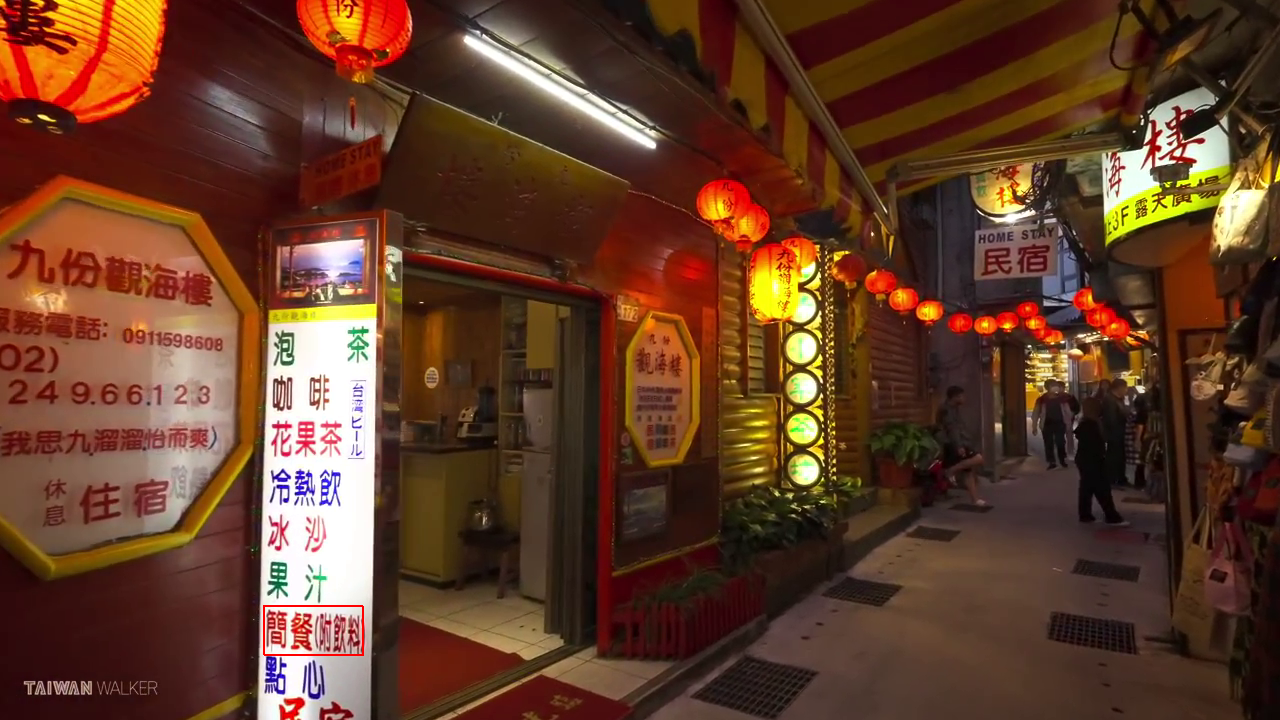

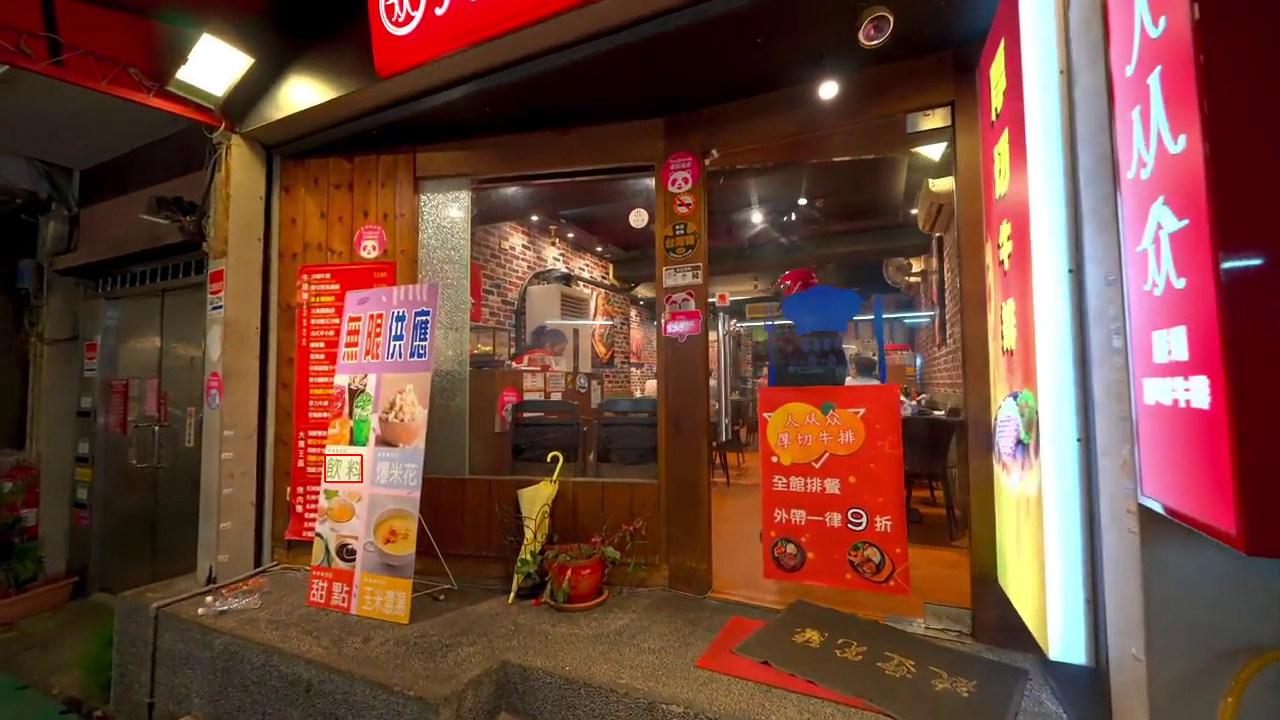

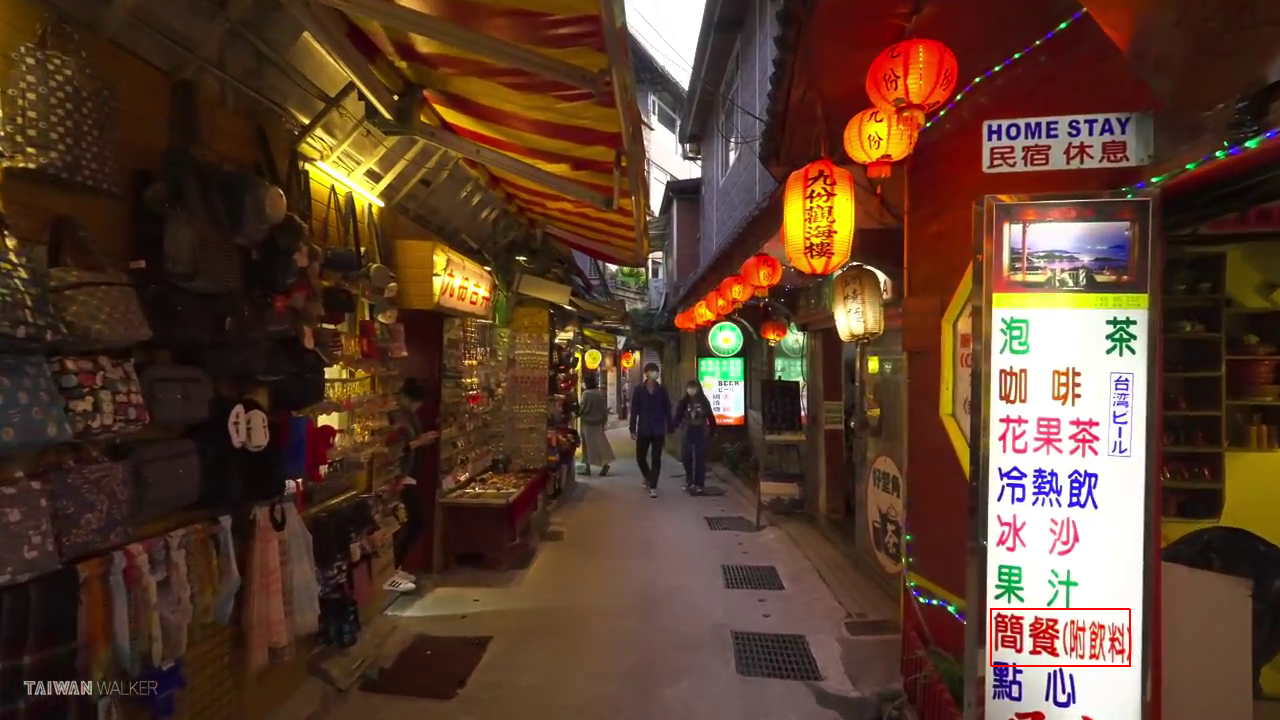

In [47]:
key = '飲料'
retrieval_list = []
for file in database.keys():
   # print(database[file])
   for str in database[file]:
      if key in str:
         retrieval_list.append(file)

from PIL import Image, ImageDraw

image_path = './datasets/d503/test/images'
print(retrieval_list)
retrieval_list = set(retrieval_list)
for ret in retrieval_list:
   
   j = open(os.path.join(all_json_path, ret))
   data = json.load(j)
   bbox_list = data['shapes']
   retrieval_bbox = []
   for bbox in bbox_list:
      if key in ''.join(bbox['label'].split(' ')):
         retrieval_bbox.append(bbox['points'])
   
   image = Image.open(os.path.join(image_path, ret[:-4]+'png'))

   for ret_box in retrieval_bbox:
   
      draw = ImageDraw.Draw(image)
      color = 'red'
      thickness = 2

      for i in range(thickness):
         offset_points = [(x-i, y-i) for x, y in ret_box]
         draw.polygon(offset_points, outline=color)

   image.show()